# Pymaceuticals Inc.
---

### Analysis


 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pyma_data_df = pd.merge( study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pyma_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [40]:
# Checking the number of mice.
mouse_count = len(pyma_data_df["Mouse ID"].unique())
mouse_count

249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = pyma_data_df.loc[pyma_data_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_ID 


array(['g989'], dtype=object)

In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID_df = pyma_data_df.loc[pyma_data_df["Mouse ID"] == "g989", :]
duplicate_mice_ID_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pyma_data_df[pyma_data_df["Mouse ID"].isin(duplicate_mice_ID) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [52]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_df["Mouse ID"].unique())
clean_mouse_count


248

## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_st = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

In [56]:
# Assemble the resulting series into a single summary DataFrame.
summary_st 


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_table = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [58]:
# First create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen 
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice')

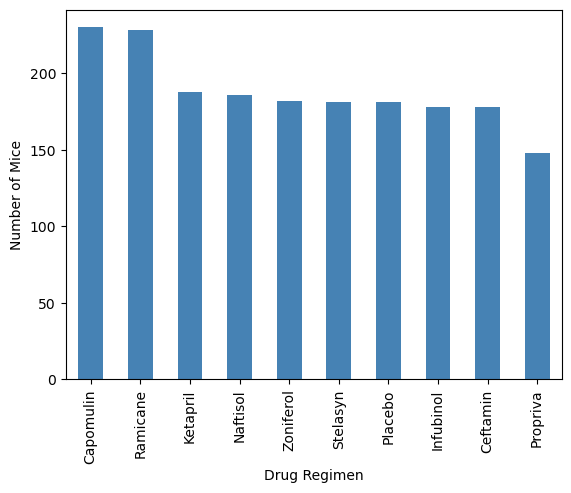

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot_pandas = mice_count.plot.bar(color='steelblue') 

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

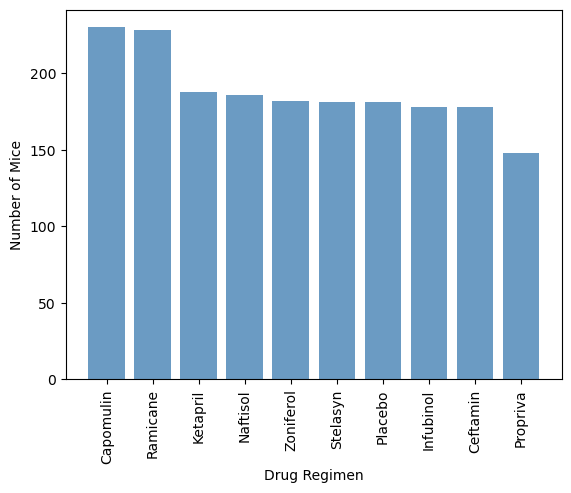

In [76]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
pyplot_x_axis = mice_count.index.values
pyplot_y_axis = mice_count.values

plt.bar(pyplot_x_axis, pyplot_y_axis, color='steelblue', alpha=0.8, align='center')

# Set labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

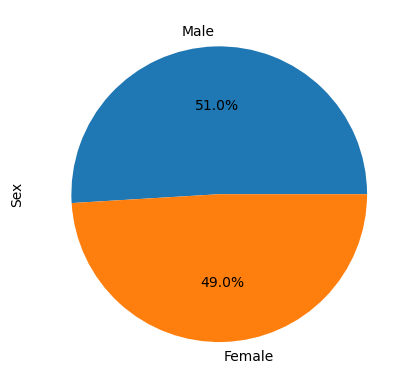

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = clean_df["Sex"].value_counts()
gender_pie.plot.pie(autopct= "%1.1f%%")
plt.show()

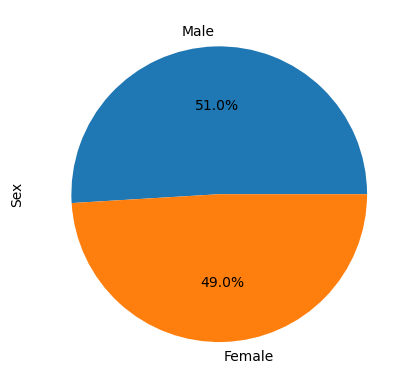

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_pie.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_four_regiments = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin")|(clean_df["Drug Regimen"]=="Ramicane")|(clean_df["Drug Regimen"]=="Infubinol")|(clean_df["Drug Regimen"]=="Ceftamin") ,:]

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_four_regiments = final_tumor_four_regiments.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_four_regiments = pd.merge(final_tumor_four_regiments, clean_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]],on=["Mouse ID","Timepoint"],how="left")
final_tumor_four_regiments

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [140]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = [[] for i in range (4)]
for i in range(100):
    drug_regimen = final_tumor_four_regiments.iloc[i, :]["Drug Regimen"]
    tumor_size = final_tumor_four_regiments.iloc[i, :]["Tumor Volume (mm3)"]
    for j in range (4):
        if drug_regimen == treatments[j]:
            tumor_vol[j].append(tumor_size)
            continue

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
quartiles=[[] for i in range(4)]
lowerq=[[] for i in range(4)]
upperq=[[] for i in range(4)]
iqr=[[] for i in range(4)]
lower_bound=[[] for i in range(4)]
upper_bound=[[] for i in range(4)]
potential_outliers=[[] for i in range(4)]
    
for num,treatment in enumerate(treatments):
    quartiles[num] = final_tumor_four_regiments.loc[final_tumor_four_regiments["Drug Regimen"] == treatment,:]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq[num] = quartiles[num][0.25]
    upperq[num] = quartiles[num][0.75]
    iqr[num] = upperq[num]-lowerq[num]

    print(f"The lower quartile of {treatment} tumor volume is: {lowerq[num]}")
    print(f"The upper quartile of {treatment} tumor volume is: {upperq[num]}")
    print(f"The interquartile range of {treatment} tumor volume is: {iqr[num]}")
    print(f"The the median of {treatment} tumor volume is: {quartiles[num][0.5]} ")

    lower_bound[num] = lowerq[num] - (1.5*iqr[num])
    upper_bound[num] = upperq[num] + (1.5*iqr[num])
    print(f"Values below {lower_bound[num]} could be outliers.")
    print(f"Values above {upper_bound[num]} could be outliers.")

    for tumor in tumor_vol[num]:
        if tumor > upper_bound[num] or tumor < lower_bound[num]:
            potential_outliers[num].append(tumor)
    if len(potential_outliers[num])>0:
        print(f"The the potential outliers for {treatment} are: {potential_outliers[num]}\n")
    else:
        print(f"There are no potential outliers for {treatment}.\n")
    

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are no potential outliers for Capomulin.

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are no potential outliers for Ramicane.

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The the median of Infub

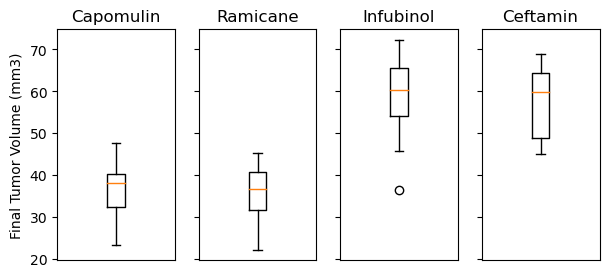

In [156]:
# Generate a p that shows the distrubution of the tumor volume for each treatment group.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4,sharey=True,figsize=(7,3))

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_title(treatments[0])
ax1.boxplot(tumor_vol[0])
ax1.set_xticks([])

ax2.set_title(treatments[1])
ax2.boxplot(tumor_vol[1])
ax2.set_xticks([])

ax3.set_title(treatments[2])
ax3.boxplot(tumor_vol[2])
ax3.set_xticks([])

ax4.set_title(treatments[3])
ax4.boxplot(tumor_vol[3])
ax4.set_xticks([])


plt.show()
    

## Line and Scatter Plots

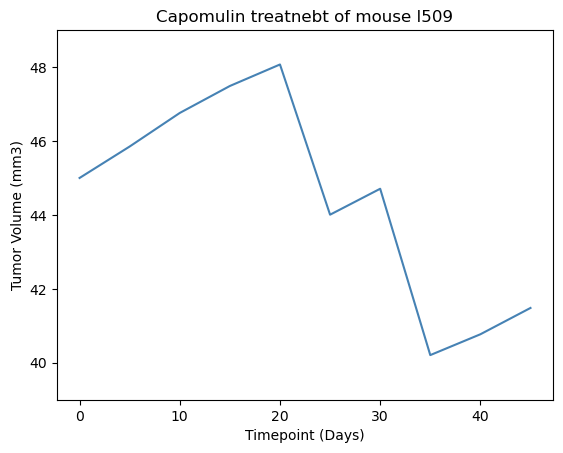

In [177]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = clean_df.loc[clean_df["Mouse ID"]=='l509',:]
x_axis= line_plot["Timepoint"].count()
plt.plot(line_plot["Timepoint"],line_plot["Tumor Volume (mm3)"],color="steelblue")
plt.title("Capomulin treatnebt of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(39,49)
plt.show()

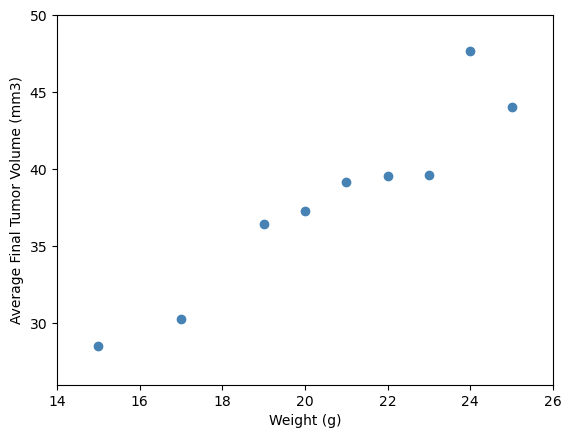

In [184]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]
weight_df = weight_df.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()
weight_df = pd.merge(weight_df,clean_df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Weight (g)"]],on=["Mouse ID","Timepoint"],how="left")
weight_df = weight_df.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index(name="Average Tumor Volume")

plt.scatter(weight_df["Weight (g)"], weight_df["Average Tumor Volume"], marker="o", facecolors="steelblue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Final Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(26,50)
plt.show()

## Correlation and Regression


The correlation between mouse weight and the average tumor volume is 0.84


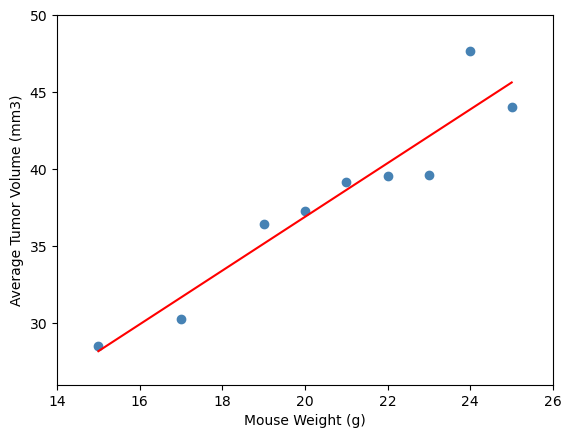

In [194]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(weight_df["Weight (g)"], weight_df["Average Tumor Volume"])
m_fit = m_slope * weight_df["Weight (g)"] + m_int
plt.scatter(weight_df["Weight (g)"], weight_df["Average Tumor Volume"], facecolors="steelblue")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(26,50)
plt.plot(weight_df["Weight (g)"],m_fit, color="red")

print ("The correlation between mouse weight and the average tumor volume is 0.84")

plt.show()

